# <span style="color:#6495ED">Linguistic comparison of *Pride and Prejudice* and *Jane Eyre*</span>

## Introduction

### <span style="color:maroon">About Project Gutenberg</span>

Project Gutenberg was found by Michael Hart, the inventor of eBooks. The project is an online library of free digitalised books. It contains some of the greatest classics of world literature, including __Jane Austen's _Pride and Prejudice___ and __Charlotte Brontë's _Jane Eyre: An Autobiography.___

<a href="https://gutenberg.org/"><img src="https://gutenberg.org/gutenberg/pg-logo-129x80.png"/></a>
 
    
Project Gutenberg Mission Statement:
>_To encourage the creation and distribution of eBooks._

### <span style="color:maroon">About the books</span>

Both books are among the most renowned pieces of 19th century English literature by female authors. On the surface level, the plots of the stories may seem very similar - <span style="color:teal"> a young, stong-minded woman meets a seemingly disagreeable man, who turns out to be much more affectionate on closer acquaintance, so much so that they end up getting married.<span/>

However, the two novels differ siginficantly in a few aspects: 
- the heroins have vastly different backgrounds and biographies;
- Austen's book, besides romantic subplots, focuses on critique of higher societies;
- Brontë's work belongs to gothic literature, with supernatural elements and high emotional intensity;
- Austen's writing style is rather light and humorous, while Brontë's book is on the darker side.
    
<div style="display: flex; justify-content: space-around;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/CassandraAusten-JaneAusten%28c.1810%29_hires.jpg" style="width: 30%; height: auto;" />
        <img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Charlotte_Bronte_coloured_drawing.png" style="width: 30%; height: auto;" />
</div>

            Portraits of Jane Austen (left) and Charlotte Brontë (right).

In this short report, I will attempt to capture how these differences are reflected in linguistic properties of Jane Austen's _Pride and Prejudice_ and Charlotte Brontë's _Jane Eyre: An Autobiography,_ based on the sources published by Project Gutenberg:
    
-  [_Pride and Prejudice_](https://www.gutenberg.org/cache/epub/1342/pg1342-images.html)
-  [_Jane Eyre: An Autobiography_](https://gutenberg.org/cache/epub/1260/pg1260-images.html).

## Linguistic analysis in Python

### <span style="color:maroon">Data preparation</span>

Before the analysis, we havo to prepare the data. First, let's scrape the contents of both books, using _requests_ and _bs4_ packages in python.

In [163]:
import requests
from bs4 import BeautifulSoup
from string import punctuation
 

def scrape(address):
    website = requests.get(address)
    soup = BeautifulSoup(website.content, 'html.parser')
    paras = soup.find_all('p')
    result = []
    for el in paras:
        if len(el.getText().strip()) > 0:
            
            result.extend(el.getText().strip(punctuation).split())           
    return result

pride_and_prejudice = scrape("https://www.gutenberg.org/cache/epub/1342/pg1342-images.html")
print(f'Number of words in "Pride and Prejudice": \t{len(pride_and_prejudice)}')

jane_eyre = scrape("https://gutenberg.org/cache/epub/1260/pg1260-images.html")
print(f'Number of words in "Jane Eyre": \t\t{len(jane_eyre)}')

Number of words in "Pride and Prejudice": 	126267
Number of words in "Jane Eyre": 		185182


The next step is to tag parts of speech and lemmatize the words.

In [115]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def get_tokens(book):
    tuples = []
    for word in book:
        tokens = nltk.word_tokenize(word)
        pos_tagged = nltk.pos_tag(tokens)
        for item in pos_tagged:
            tuples.append(item)
    return tuples

def count_pos(tuples):    
    counter_dict = {}
    for el in tuples:
        tag = el[1]
        if not tag in counter_dict:
            counter_dict[tag] = 1
        else:
            counter_dict[tag] += 1
    return counter_dict

def get_lemmas(tuples):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word, tag in tuples:
        try:
            lemmas.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
        except KeyError:
            lemmas.append(word)
    return lemmas

pride_tokens = get_tokens(pride_and_prejudice)
pride_lemmatized = get_lemmas(pride_tokens)
pride_pos_count = count_pos(pride_tokens)

jane_tokens = get_tokens(jane_eyre)
jane_lemmatized = get_lemmas(jane_tokens)
jane_pos_count = count_pos(jane_tokens)

Now, let's move on to the actual analysis.

### <span style="color:maroon">Parts of Speech analysis</span>

First, we'll compare the distribution of used word classes, based on the POS tags that were extracted before. We'll only take into account the 10 most common POS of each book.

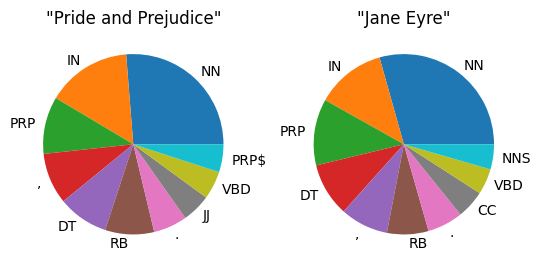

In [192]:
plt.subplot(1,2,1)

def plot_pos(pos_count, plot_title):
    
    keys = []
    values = []
    
    for el in sorted(pos_count.items(), key=lambda x:x[1], reverse=True)[0:10]:
        keys.append(el[0])
        values.append(el[1])
    plt.pie(values, labels=keys)
    plt.title(plot_title)


plt.subplot(1,2,1)
plot_pos(pride_pos_count, '"Pride and Prejudice"')

plt.subplot(1,2,2)
plot_pos(jane_pos_count, '"Jane Eyre"')

There seems to be no significant diversity in the first seven most common parts of speach of the two books. However, Austen used in her work statistically more adjectives (JJ) and posessive pronouns (PRP$), whereas Brontë's piece contained more coordinating conjunctions (CC) and plural nouns (NNS).

### <span style="color:maroon">Lexical analysis</span>

#### Lexical dispertion plots

I chose twelve words that may suggest the main plots, themes and mood of the books and used them to conduct lexical dispersion analysis. The obtained plots show where and how frequently the words occur in the text.

<AxesSubplot: title={'center': '"Jane Eyre: An Autobiography" - Lexical Dispersion Plot'}, xlabel='Word Offset'>

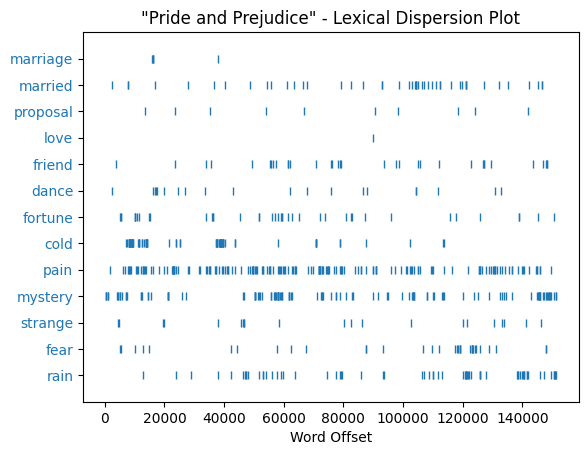

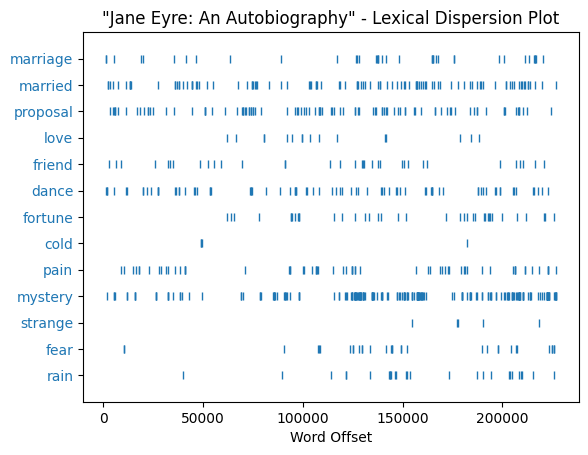

In [161]:
import matplotlib.pyplot as plt

words_list = ['marriage', 'proposal', 'love', 'friend', 'dance', 'fortune', 'cold', 'pain', 'mystery', 'strange', 'fear', 'rain']

nltk.draw.dispersion.dispersion_plot(pride_lemmatized, words_list[::-1], ignore_case=True, title='"Pride and Prejudice" - Lexical Dispersion Plot')
nltk.draw.dispersion.dispersion_plot(jane_lemmatized, words_list[::-1], ignore_case=True, title='"Jane Eyre: An Autobiography" - Lexical Dispersion Plot')


#### Word frequency comparison

For a more precise comparison, I counted how many times each of the chosen words occurs in the texts and normalized the results with respect to 100.000 words.

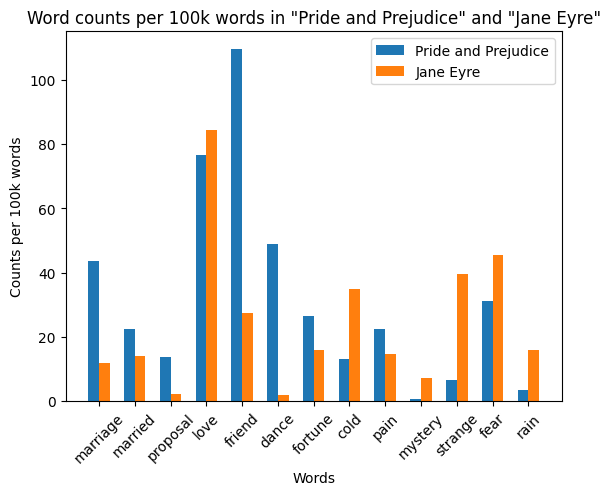

In [162]:
pride_and_prejudice_counts = [pride_lemmatized.count(word)/len(pride_lemmatized)*100000 for word in words_list]
jane_eyre_counts = [jane_lemmatized.count(word)/len(jane_lemmatized)*100000 for word in words_list]

bar_width = 0.3
index = range(len(words_list))

bar1 = plt.bar(index, pride_and_prejudice_counts, bar_width, label='Pride and Prejudice')
bar2 = plt.bar([i + bar_width for i in index], jane_eyre_counts, bar_width, label='Jane Eyre')

plt.xlabel('Words')
plt.ylabel('Counts per 100k words')
plt.title('Word counts per 100k words in "Pride and Prejudice" and "Jane Eyre"')
plt.xticks([i + bar_width / 2 for i in index], words_list, rotation=45)
plt.legend()

The most significant differences can be observed for the words <span style="color:blue">"friend", "marriage", "dance",</span> <span style="color:orange">"strange"</span> and <span style="color:orange">"cold"</span>, of which the first three occur much more frequently in _"Pride and Prejudice"_ and the last two in _"Jane Eyre: An Autobiography"_. Those words in particular reflect the discrepancy between Austen's social realism novel and Brontë's gothic romance.

#### Most frequent words

Finally, here are the lists of the top 100 words from each book, based on their frequency. Stop words have been discarded.

In [191]:
from nltk.corpus import stopwords

def display_most_frequent_words(words, number):
    sw = (stopwords.words('english'))
    frequency = nltk.FreqDist(words)
    n = 1
    for el in sorted(frequency.items(), key=lambda x:x[1], reverse=True):
        if n > number:
            break
        else:
            if (el[0] not in sw) and (el[0] not in punctuation):
                print(f"{n}. {el[0]:15s}", el[1])
                n += 1
    print('\n')

print('Most frequent words of "Pride and Prejudice":')
display_most_frequent_words(pride_lemmatized, 100)

print('Most frequent words of "Jane Eyre: An Autobiography":')
display_most_frequent_words(jane_lemmatized, 100)

Most frequent words of "Pride and Prejudice":
1. I               2092
2. “               1822
3. ”               1791
4. Mr              793
5. ’               756
6. Elizabeth       630
7. say             610
8. could           521
9. would           479
10. Darcy           427
11. Mrs             351
12. make            341
13. know            334
14. much            331
15. Bennet          330
16. She             326
17. But             318
18. must            312
19. Miss            310
20. Bingley         306
21. Jane            297
22. sister          292
23. go              290
24. see             289
25. The             280
26. one             280
27. well            276
28. give            273
29. come            255
30. It              253
31. think           241
32. He              236
33. time            221
34. never           221
35. though          219
36. soon            214
37. You             206
38. might           205
39. Wickham         197
40. may             196


###  <span style="color:#6495ED">Thank you for reading.</span>